# Outline
    
### Exploratory Data Analysis
    
### Machine Learning


In [88]:
!jt -l


Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [87]:
!jt -t monokai

---

In [89]:
import matplotlib.pyplot as plt, seaborn as sns, numpy as np, pandas as pd
from scipy.stats import percentileofscore
import os

from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, recall_score,precision_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [91]:
data = pd.read_csv('titanic/train.csv')
df = data.copy()

In [92]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
data.shape

(891, 12)

In [94]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [95]:
data.describe(exclude=np.number).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [96]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
data.duplicated().any()

False

In [1164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Univariate Analysis

<br>

<br>

### Survival Column (Target)

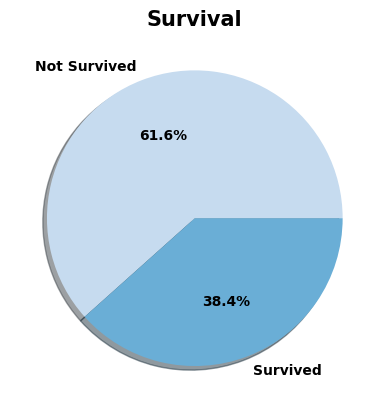

In [98]:
sns.set_palette('Blues',3)
plt.pie(data['Survived'].value_counts(),labels=['Not Survived','Survived'],shadow=True,autopct='%1.1f%%')
plt.title('Survival',fontsize=15)
plt.show()

More than <font color='steelblue'>60%</font> of Passengers <font color='#de1507'>Not Survived</font>

### Port of Embarkation, Passenger class and Sex 

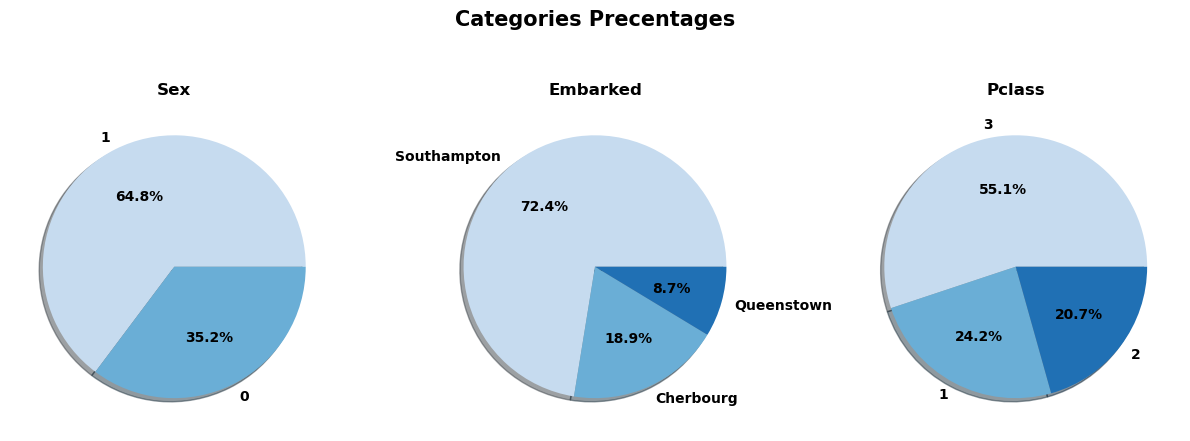

In [178]:
sns.set_palette('Blues',3)
labelss = {'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' :'Southampton'}
data['Embarked'] = data['Embarked'].replace(labelss)
cols = ['Sex','Embarked','Pclass']

def plot_pie(dataa,cols,title,fontsize=15,figsize=(12,5)):
    fig,ax = plt.subplots(1,len(cols),figsize=figsize)
    for i,col in enumerate(cols):
        ax[i].pie(dataa[col].value_counts(),labels=dataa[col].value_counts().index
        ,shadow=True,autopct='%1.1f%%')
        ax[i].set_title(col)

    fig.suptitle(title,fontsize=fontsize)
    fig.tight_layout()
    plt.show()
    
plot_pie(data,cols,'Categories Precentages')

1 - Men were the **majority** aboard the titanic

2 - Most Port of Embarkation was <font color='lightgreen'>Southampthon</font> (England)

3 - More than <font color ='steelblue'>50%</font> of Passengers were in <font color ='steelblue'>3rd Class</font>

### Cabin

In [100]:
data['Cabin'].isna().sum()

687

In [1173]:
data['Cabins_letter'] = data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'None')
data['Cabins_letter'].value_counts(dropna=False)

Cabins_letter
None    687
C        59
B        47
D        33
E        32
A        15
F        13
G         4
T         1
Name: count, dtype: int64

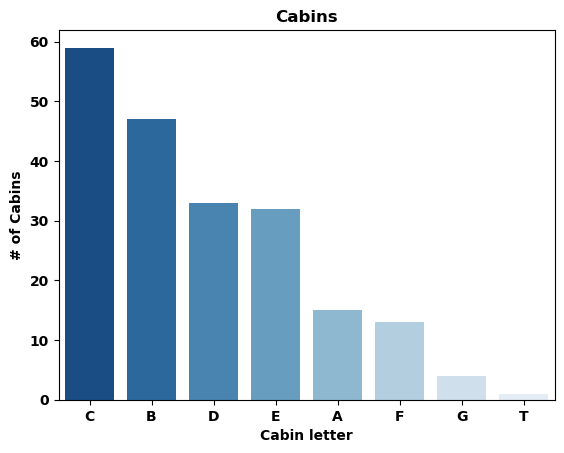

In [1174]:

sns.barplot(x=data['Cabins_letter'].value_counts().index[1:],
            y=data['Cabins_letter'].value_counts().values[1:],palette='Blues_r')
plt.ylabel('# of Cabins');plt.xlabel('Cabin letter')
plt.title('Cabins')
plt.show()

we get the first letter of cabin name as maybe them in different floors on the ship, We will compare later if certain cabins have more chance to survive or not.

Unknown indicate the cabin number was missing data,

In [1175]:
data.groupby('Cabins_letter')['Survived'].value_counts()

Cabins_letter  Survived
A              0             8
               1             7
B              1            35
               0            12
C              1            35
               0            24
D              1            25
               0             8
E              1            24
               0             8
F              1             8
               0             5
G              0             2
               1             2
None           0           481
               1           206
T              0             1
Name: count, dtype: int64

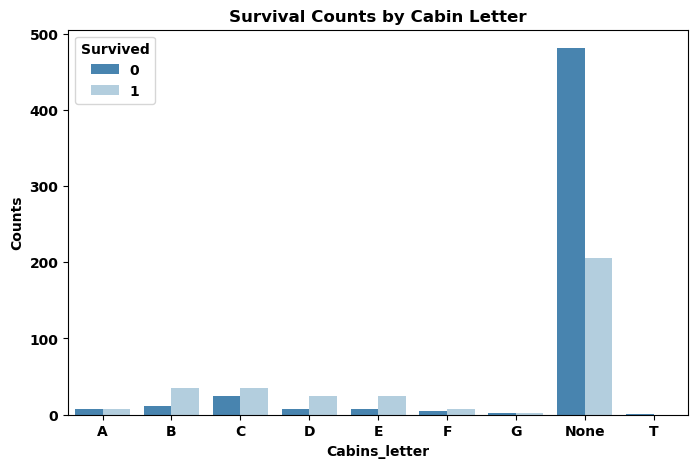

In [1179]:
df_counts = data.groupby('Cabins_letter')['Survived'].value_counts().reset_index(name='Counts')
plt.figure(figsize=(8, 5))
sns.barplot(x='Cabins_letter', y='Counts', hue='Survived', data=df_counts,palette='Blues_r')
plt.title('Survival Counts by Cabin Letter')
plt.show()

In [1184]:
ee = pd.get_dummies(data['Cabins_letter'],dtype=int)
for col in ee.columns:
    data[col] = ee[col]

In [1185]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabins_letter,A,B,C,D,E,F,G,None,T
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,...,None,0,0,0,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,0,1,0,0,0,0,0,0


In [1191]:
data.corr(numeric_only=True)['Pclass'].sort_values(ascending=False)

Pclass         1.000000
None           0.725541
SibSp          0.083081
G              0.055561
Parch          0.018443
F              0.011063
PassengerId   -0.035144
T             -0.052496
A             -0.204934
E             -0.230091
D             -0.278690
Survived      -0.338481
Age           -0.369226
B             -0.369572
C             -0.417048
Fare          -0.549500
Name: Pclass, dtype: float64

- <font color='lightgreen'>B,C</font> seems to close to 1st Class section in the ship
- Cibins without letter on it in data highly correlated with Passenger Class.

### Ticket

In [103]:
data['Ticket'].nunique()

681

In [104]:
data['Ticket'].sample(10)

505           PC 17758
877             349212
442             347076
290              19877
129             347061
45     S.C./A.4. 23567
179               LINE
153           A/5. 851
375           PC 17604
823             392096
Name: Ticket, dtype: object

we will **drop** this column because we can't extract valiable information from it.

### Name

In [105]:
data['Name'].sample(10)

557                               Robbins, Mr. Victor
292                            Levy, Mr. Rene Jacques
16                               Rice, Master. Eugene
269                            Bissette, Miss. Amelia
558            Taussig, Mrs. Emil (Tillie Mandelbaum)
317                              Moraweck, Dr. Ernest
816                      Heininen, Miss. Wendla Maria
424                       Rosblom, Mr. Viktor Richard
739                                Nankoff, Mr. Minko
328    Goldsmith, Mrs. Frank John (Emily Alice Brown)
Name: Name, dtype: object

we will **drop** this column also.

---

### Numirical Columns

#### AGE

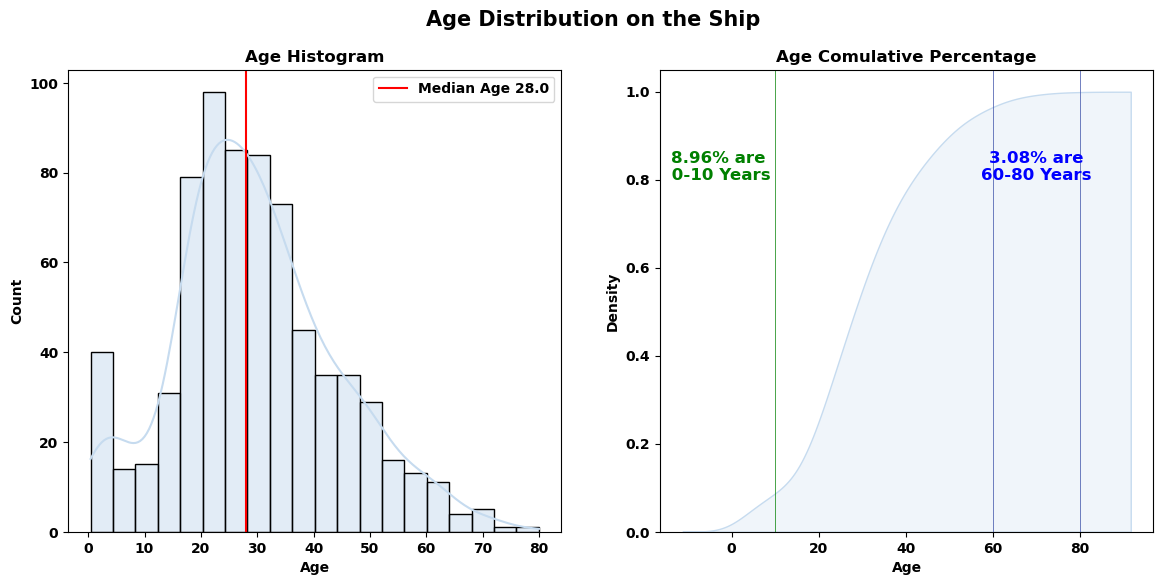

In [106]:
less10_years = percentileofscore(data['Age'],10,kind='weak',nan_policy='omit')
from80to60 = percentileofscore(data['Age'],80,kind='weak',nan_policy='omit')-\
            percentileofscore(data['Age'],60,kind='weak',nan_policy='omit')



fig,ax= plt.subplots(1,2,figsize=(14,6))
sns.set_palette('Paired')
sns.histplot(data=data,x='Age',kde=True,ax=ax[0])
sns.kdeplot(data=data,x='Age', cumulative=True,fill=True,ax=ax[1])

ax[0].axvline(data['Age'].median(),color='r',label=f"Median Age {data['Age'].median()}")
ax[1].axvline(10,color='g',label=f"{less10_years:.2f}% Less than 10 years",linewidth=.5)
ax[1].axvline(80,color='#384ca6',label=f"{from80to60:.2f}% from 60 to 80 Years",linewidth=.5)
ax[1].axvline(60,color='#384ca6',linewidth=.5)

ax[1].text(70, 0.8, f'{from80to60:.2f}% are\n60-80 Years', fontsize=12, ha='center', color='Blue')
ax[1].text(-3, 0.8, f'{less10_years:.2f}% are\n 0-10 Years', fontsize=12, ha='center', color='green')



ax[0].set_title('Age Histogram')
ax[1].set_title('Age Comulative Percentage')

fig.suptitle('Age Distribution on the Ship',fontsize=15)
ax[0].legend()
# ax[1].legend()

plt.show()

Age distribution almost getting close to normal distribution, We notice that there is many children less than 10 years aboard the ship (<font color='green'>9%</font> Less than 10 years),

Summing up the Old people and Young ( Assuming their is kind of Heaviness in movement in both ) resulting <font color='green'>13%</font>= more than 100 of Passengers.

We will discuss the ability of both classes of survival later..

### # of Parents/Children

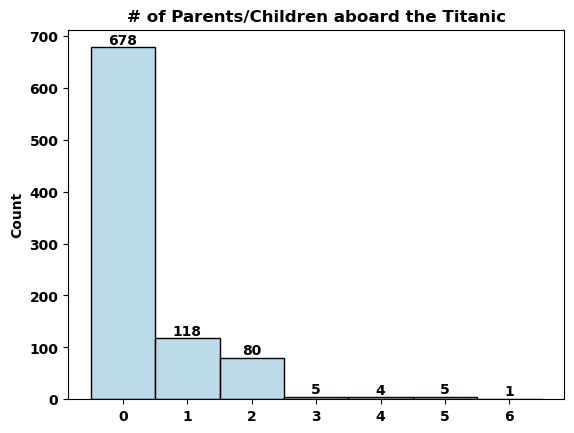

In [107]:
ax = sns.histplot(data['Parch'],discrete=True)
for i in ax.containers:ax.bar_label(i,)
plt.title('# of Parents/Children aboard the Titanic')
plt.xlabel('')
plt.show()

- Most passengers are without Parents or children on the ship, leaving more than 200 passenger.

- Are passengers with Parent or children has more chance or the opposite? we will discuss.

### # of siblings / spouses 

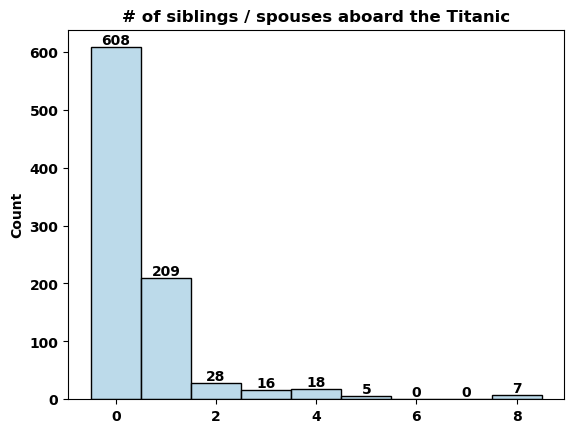

In [108]:
ax = sns.histplot(data=data,x='SibSp'
                  ,discrete=True
                 )
for i in ax.containers:ax.bar_label(i)
plt.title('# of siblings / spouses aboard the Titanic');plt.xlabel('')
plt.show()

- Most Passengers without siblings/spouses on the ship.

Question is : 

Are people with siblings/spouses has more chance to survive or not?

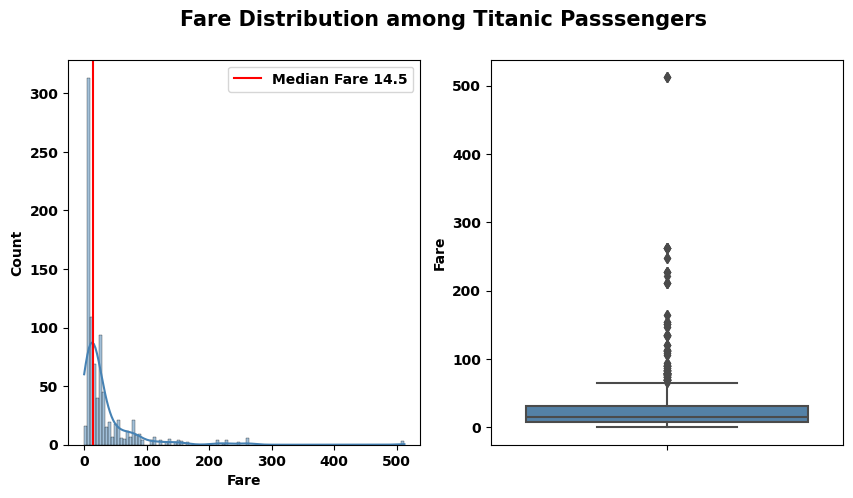

In [1161]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=data,x='Fare',kde=True,color='steelblue',ax=ax[0])
ax[0].axvline(data['Fare'].median(),color='r',label=f"Median Fare {data['Fare'].median():.1f}")

sns.boxplot(data=data,y='Fare',ax=ax[1],color='steelblue')
ax[0].legend()
fig.suptitle('Fare Distribution among Titanic Passsengers',size=15)
plt.show()

- Box plot resulting many outlires in Fare column.

- Are People with alot of fare surivived?

In [1163]:
df[df['Fare']>100]['Survived'].value_counts()

Survived
1    39
0    14
Name: count, dtype: int64

# Bivariate Anlysis

### Survival Among Differnet Categories

In [110]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [111]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabins_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Unknown


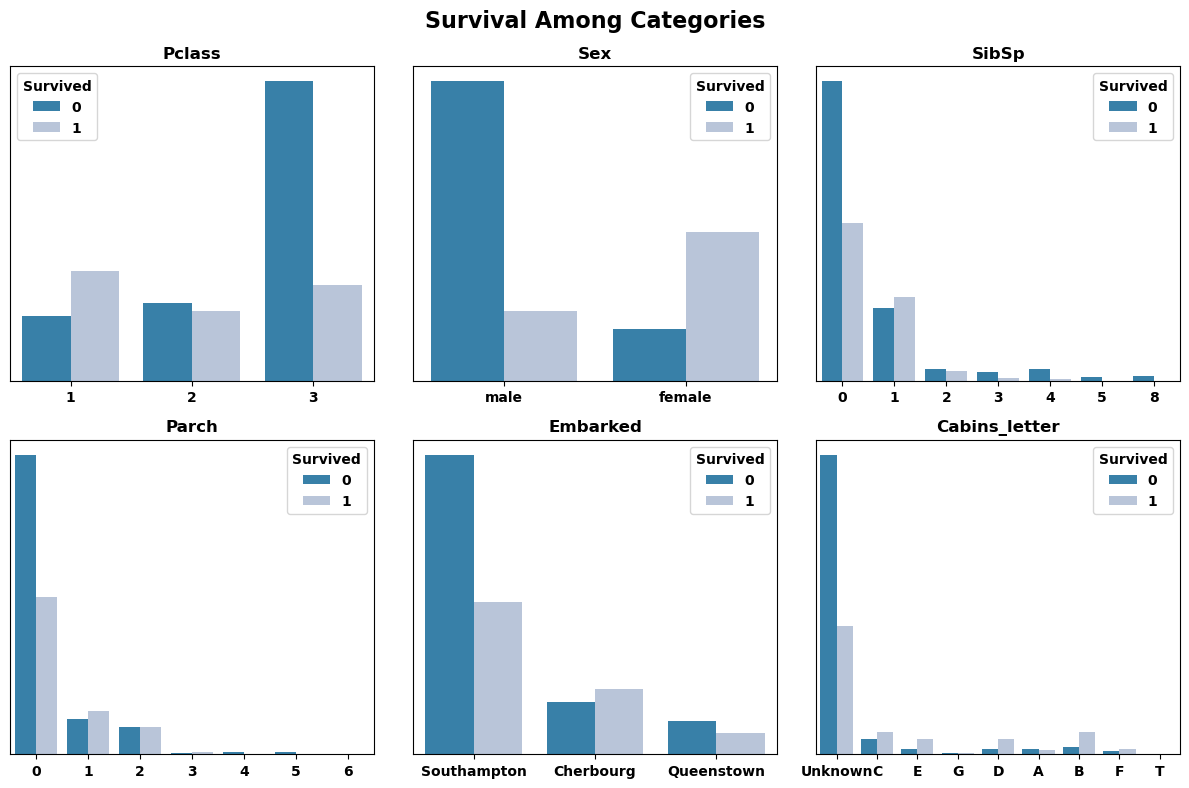

In [112]:
cat_cols = ['Pclass','Sex','SibSp','Parch','Embarked','Cabins_letter']
fig,ax = plt.subplots(2,3,figsize=(12,8))
for i,col in enumerate(cat_cols):
    r,c = i//3,i%3
    sns.countplot(data=data,x=col,hue='Survived',ax=ax[r,c],palette='PuBu_r')
    ax[r,c].set_title(col)
    ax[r,c].set_xlabel('');ax[r,c].set_ylabel('');ax[r,c].set_yticks([])

fig.suptitle('Survival Among Categories',fontsize=16)
fig.tight_layout()
plt.show()

1 - **Passenger Class**: Survival Percentage in 1st Class is higher than other classes.

2 - **Sex**: The majority of women survived.

3 - **Siblings/Spouses**: Siblings/spouses who were only 1 had the greatest chance of survival.

4 - **Parents/Children**: who were 1,2 had more chance of survival.

5 - **Embarkation Port**: Majority of Passengers who come from Charbourg(France) Survived.

#### Age distribution in data

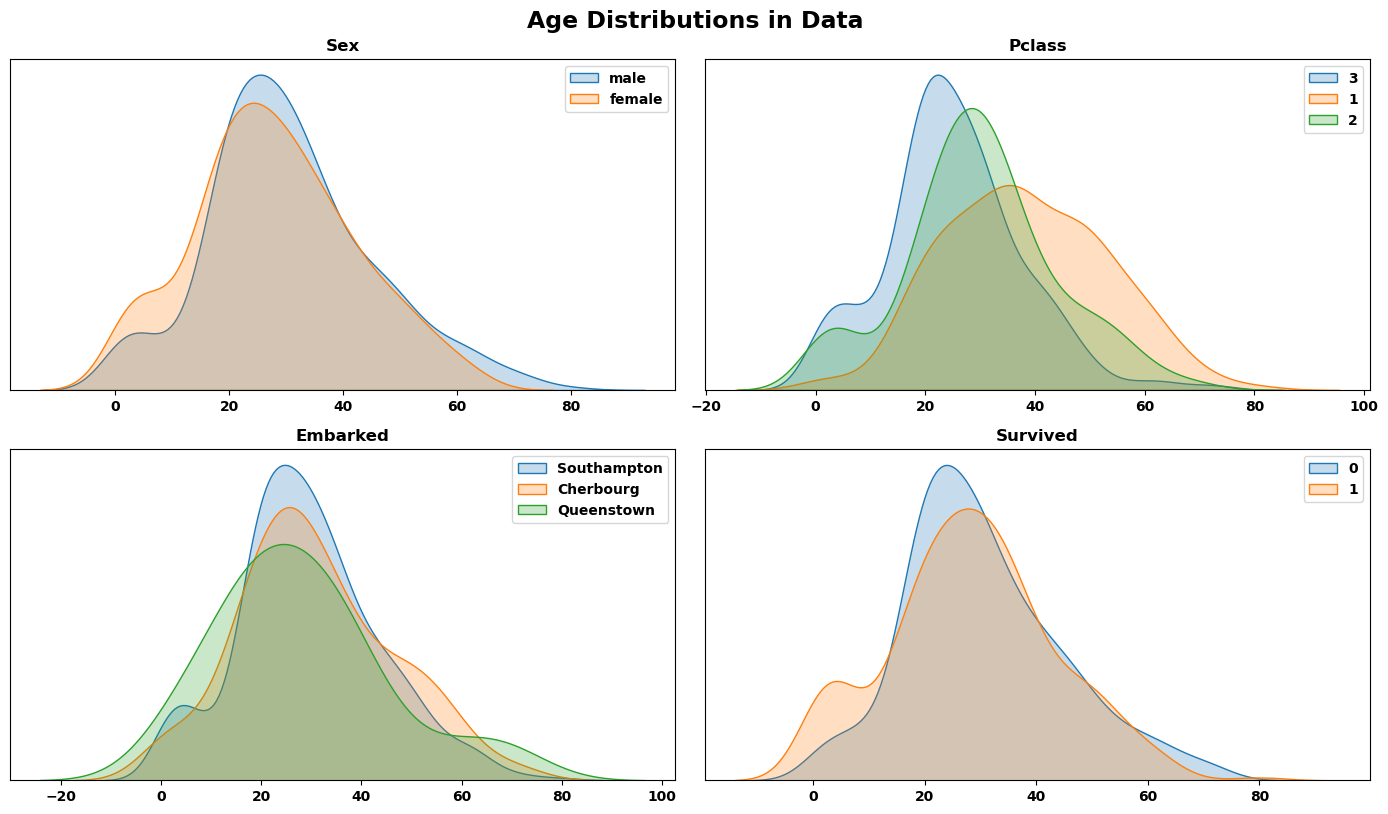

In [113]:
cat_cols=['Sex','Pclass','Embarked','Survived']
def automated_dist(num_col,additionalcolumns=0):
    fig = plt.figure(figsize=(14,12))
    
    cat_colmns = cat_cols.copy()
    if additionalcolumns:cat_colmns.append(additionalcolumns)

    for i,col in enumerate(cat_colmns):
        plt.subplot(3,2,i+1)
        toplot = data[col].unique().tolist()
        for ind,j in enumerate(toplot):
            g = sns.kdeplot(data = data[data[col]==j],x=num_col,label=j,fill=True)
        g.set_xlabel('');g.set_ylabel('');plt.yticks([])
        g.set_title(col);g.legend()

    fig.suptitle(f"{num_col} Distributions in Data",size=17)
    fig.tight_layout()
    plt.show()
    
sns.set_palette('tab10')
automated_dist('Age')

**Sex**: <font color='steelblue'>Equally</font> distributed.

**Passenger Class**: <font color='steelblue'>Class A</font> (1st class) Ages tend to be <font color='steelblue'>older</font> than others.

**Embarkation port**: <font color='steelblue'>Old Passengers (60-80)</font> are from <font color='steelblue'>Queenstown</font> Embarkation port.

**Survival**: Old Passengers (60-80) most of them <font color='#c22727'>not survived</font>.

#### Fare distribution in data

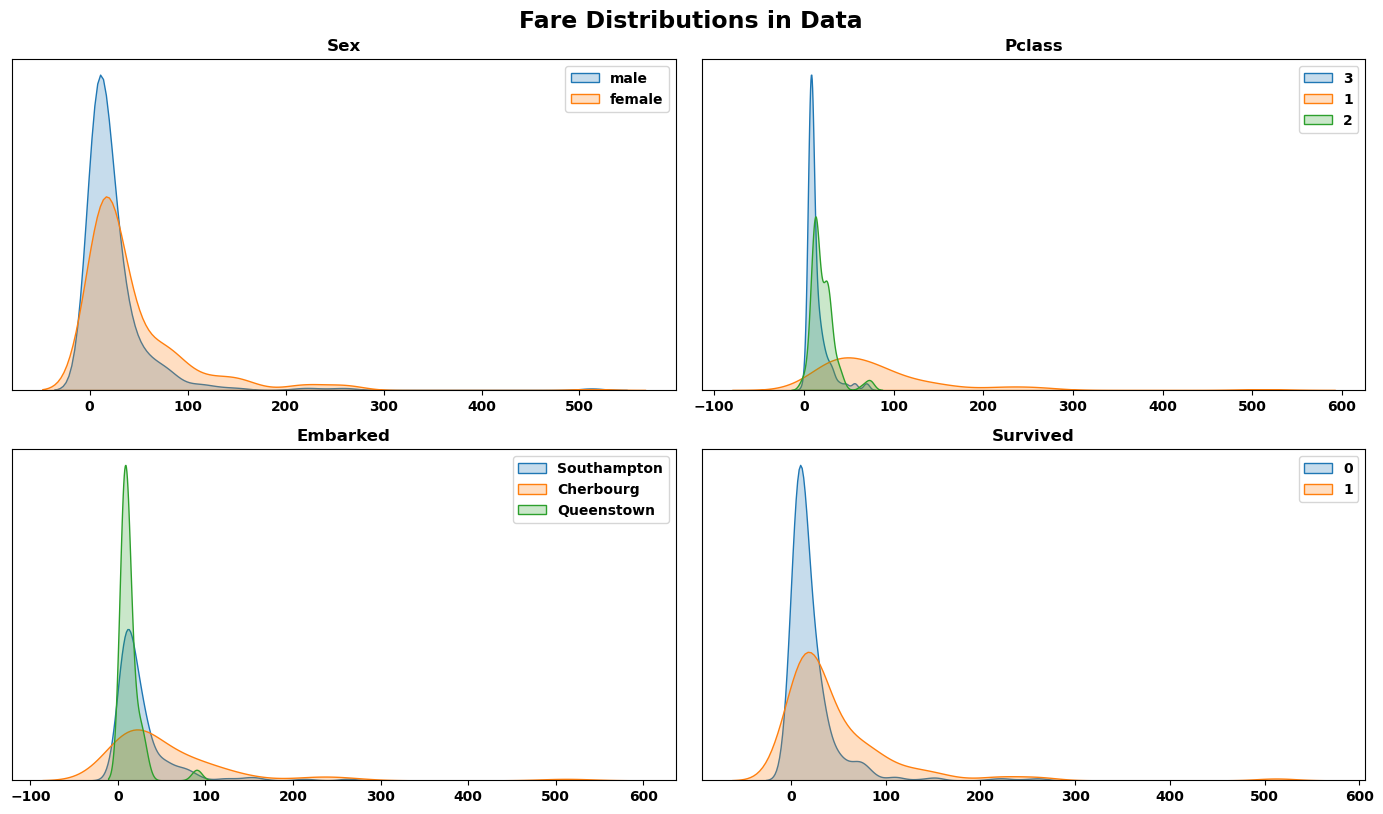

In [114]:
automated_dist('Fare')

- People with alot of Fare are <font color='steelblue'>Female</font>, <font color='steelblue'>Class A</font> Passenger Class, <font color='steelblue'>Charbourg</font> Embarkation port, And most of them <font color='#c22727'>Survived</font>

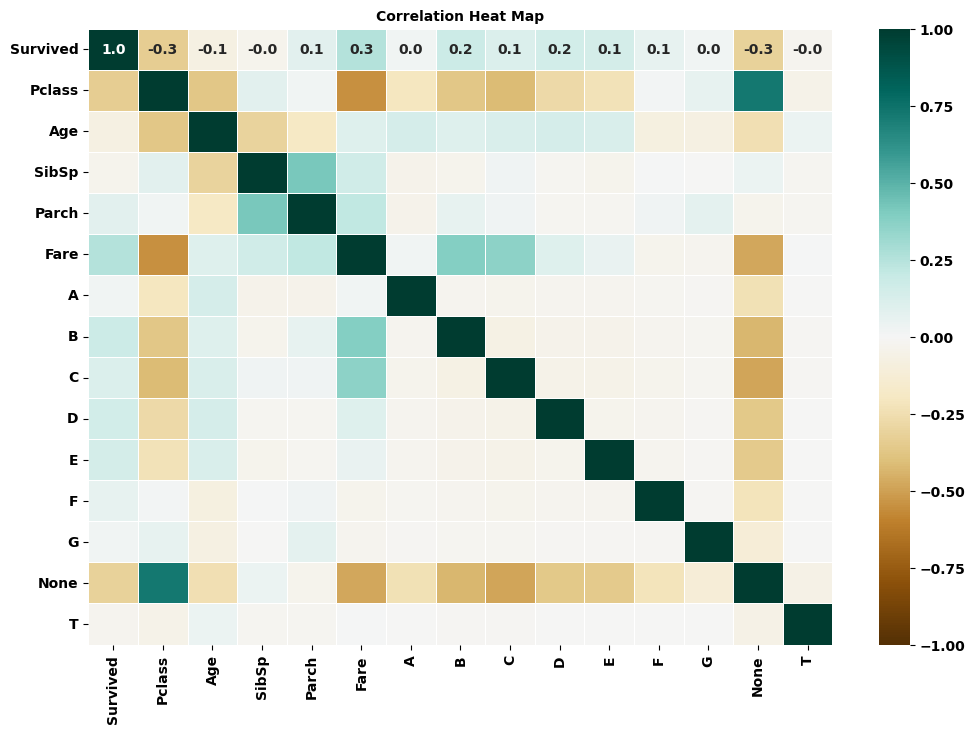

In [1193]:
plt.figure(figsize=(12,8))
sns.heatmap(data.drop(columns=['PassengerId']).corr(numeric_only=True),
            cmap='BrBG',center=0,vmin=-1,vmax=1,annot=True,fmt='.1f',linewidth=.5)
plt.title('Correlation Heat Map',fontsize=10)
plt.show()

This heatmap confirmed the assumptions we extract earlier,
- Weak <font color='steelblue'>Positive</font> correlation between **Survival** and **Fare**.

- Weak <font color='#c22727'>Negative</font> correlation between **Passenger Class** and (**Fare**, **Age** and **Survived**).

- Weak <font color='steelblue'>Positive</font> correlation between **# of Parents/Children** and (**# of siblings/spouses** and **Fare**)


> All this assumptions we mentioned it earlier.

----

# Data Preprocessing

## Plan to preprocess the data:
- Columns to **DROP**: PassengerId,Name,Ticket,Cabin.
- Columns to **Create**: Cabin_letter,Age_class,Alot_of_Fare
- Passenger Class (Pclass): leave it as it: (1,2,3) it is already encoded
- Sex: Label Encoder.
- Age: extract two classes from it( Children 0-10 y and Old 60-80) put into 3 categories in new column called('Age Class'->0,1,2 indicates 'child','normal','old') then use knn to impute missing vlaues then scaling with ( MinMax Scaler ).
- SibSp,Parch: leave as it.
- Fare: extract outlires data into new column('Alot Of Fare'->0,1) and trasfrom the original column Log Transfromation, then scaling.
- Cabin: transform this column to ( 0,1 -> there is letter in cabin or (no or null))
- Embarked: One hot encoding after impute the two missing with most frequent

In [119]:
from sklearn import set_config
set_config(transform_output='pandas',display='diagram')

In [1141]:
data = df.copy()

Let's do sum invistagation for missing values in *AGE* column

In [1142]:
missingages = data[pd.isnull(data['Age'])]

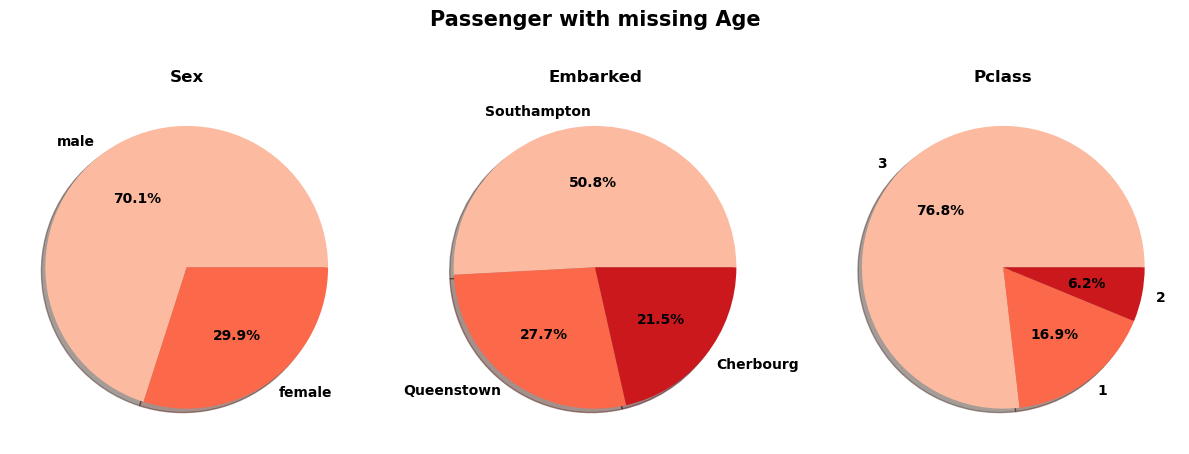

In [1143]:
sns.set_palette('Reds',3)
missingages['Embarked'].replace(labelss,inplace=True);missingages['Sex'].replace({1:'Male',0:'Female'},inplace=True)
cols = ['Sex','Embarked','Pclass']

plot_pie(missingages,cols,'Passenger with missing Age')

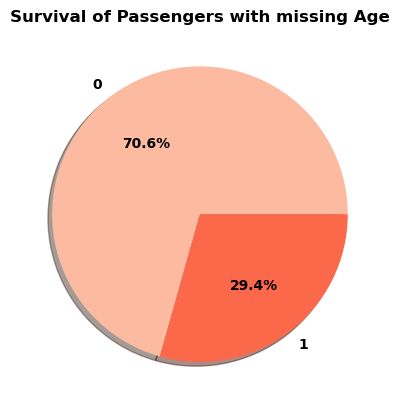

In [1144]:
plt.pie(missingages['Survived'].value_counts(),labels=missingages['Survived'].value_counts().index,shadow=True,autopct='%1.1f%%')
plt.title('Survival of Passengers with missing Age')
plt.show()

I assume that missing values here were (MNAR) missing not at random and related to unobserved data, so i will use random forest regressor (model-based imputation) to predict these ages.

In [868]:
missingages

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,Male,NaN,0,0,8.4583,Queenstown
17,1,2,Male,NaN,0,0,13.0000,Southampton
19,1,3,Female,NaN,0,0,7.2250,Cherbourg
26,0,3,Male,NaN,0,0,7.2250,Cherbourg
28,1,3,Female,NaN,0,0,7.8792,Queenstown
...,...,...,...,...,...,...,...,...
859,0,3,Male,NaN,0,0,7.2292,Cherbourg
863,0,3,Female,NaN,8,2,69.5500,Southampton
868,0,3,Male,NaN,0,0,9.5000,Southampton
878,0,3,Male,NaN,0,0,7.8958,Southampton


In [871]:
data['Fare'] = data['Fare']/data['Fare'].max()

<Axes: xlabel='Fare', ylabel='Count'>

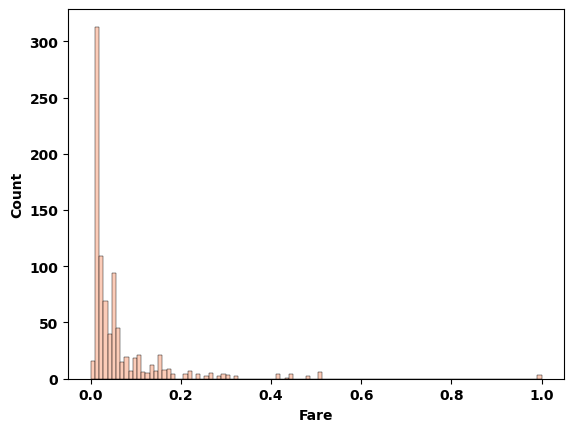

In [872]:
sns.histplot(data['Fare'])

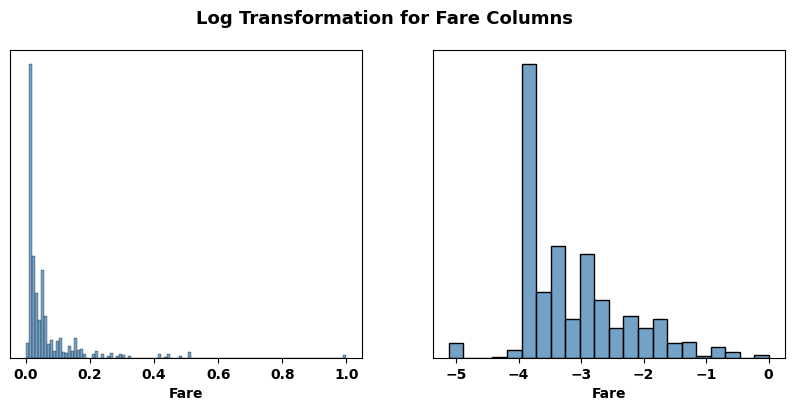

In [873]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
sns.histplot(data=data,x='Fare',color='steelblue',ax=ax[0])
sns.histplot(x=np.log(data['Fare']+.006),color='steelblue',ax=ax[1])

fig.suptitle('Log Transformation for Fare Columns',size=13)
for i in range(2):ax[i].set_yticks([]);ax[i].set_ylabel('')
plt.show()

# Pipeline

In [906]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.225,NaN,C


In [1194]:
cat_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse=False))
])

In [1195]:
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(lambda x : np.log10(x+.001), feature_names_out="one-to-one"),
    MinMaxScaler(clip=True)
)

In [1199]:
upper_limit = df['Fare'].quantile(.75) + 1.5*(df['Fare'].quantile(.75)-df['Fare'].quantile(.25))
def extract_fare(df):
    return pd.DataFrame(df['Fare'].apply(lambda x: 1 if x > upper_limit else 0))
fare_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy="median")),
    ('alot_of_fare', FunctionTransformer(extract_fare, validate=False))
])

In [1201]:
def cabin_letter_extract(data):
    return pd.DataFrame(data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'None'))
cabin_pipeline = Pipeline([
    ('cabin_letter',FunctionTransformer(cabin_letter_extract,validate=False)),
    ('cat_pipeline',cat_pipeline)
])

In [1202]:
df['Age'].skew()

0.38910778230082704

In [1203]:
def age_class_extract(df):
    return pd.DataFrame(df['Age'].apply(lambda x :  1 if x<=10 else 2 if x<=60 else 3))
age_class_pipeline = Pipeline([
    ('extract classes',FunctionTransformer(age_class_extract,validate=False))
])
age_pipeline = Pipeline([
    ('imputer',KNNImputer(n_neighbors=5)),# need to be another
    ('scaling',MinMaxScaler(clip=True))
])

## Preprocessing

In [1204]:
preprocessing = ColumnTransformer([
    ('cat',cat_pipeline,['Sex','Pclass','Embarked']),
    ('log',log_pipeline,['Fare']),
    ('extract fare',fare_pipeline,['Fare']),
    ('cabin letter',cabin_pipeline,['Cabin']),
    ('extract age classes',age_class_pipeline,['Age']),
    ('age pipeline',age_pipeline,['Age']),
    ('pass','passthrough',['SibSp','Parch'])
])

In [1205]:
preprocessing

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Sex', 'Pclass', 'Embarked']),
                                ('log',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      f...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]))]),
                                 ['Cabin']),
                                ('extract age classes',
                                 Pipeline(steps=[('extract classes',
                                                  FunctionTransformer(func=<function age_class_extract at 0x00000238CC615870>))]),
                                 ['Age']),
                                ('age pipeline',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaling',
                                                  MinMaxScaler(clip=True))]),
                                 ['Age']),
                                ('pass', 'passthrough', ['SibSp', 'Parch'])])

In [1206]:
preprocessing.fit_transform(df).sample()

,cat__Sex_female,cat__Sex_male,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,log__Fare,extract fare__Fare,...,cabin letter__Cabin_D,cabin letter__Cabin_E,cabin letter__Cabin_F,cabin letter__Cabin_G,cabin letter__Cabin_None,cabin letter__Cabin_T,extract age classes__Age,age pipeline__Age,pass__SibSp,pass__Parch
838,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.832294,0,...,0.0,0.0,0.0,0.0,1.0,0.0,2,0.396833,0,0


In [1134]:
from sklearn.feature_selection import SelectKBest, f_classif

feature_selection = SelectKBest(score_func=f_classif,k=13)

In [1208]:
final_pipeline = Pipeline([
    ('Preprocessing',preprocessing),
#     ('Feature Selection',feature_selection),
])

In [1209]:
final_pipeline.fit_transform(df.drop(columns=['Survived']),df['Survived'])

,cat__Sex_female,cat__Sex_male,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,log__Fare,extract fare__Fare,...,cabin letter__Cabin_D,cabin letter__Cabin_E,cabin letter__Cabin_F,cabin letter__Cabin_G,cabin letter__Cabin_None,cabin letter__Cabin_T,extract age classes__Age,age pipeline__Age,pass__SibSp,pass__Parch
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.676130,0,...,0.0,0.0,0.0,0.0,1.0,0.0,2,0.271174,1,0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.849978,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0.472229,1,0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.682900,0,...,0.0,0.0,0.0,0.0,1.0,0.0,2,0.321438,0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.827579,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0.434531,1,0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.684091,0,...,0.0,0.0,0.0,0.0,1.0,0.0,2,0.434531,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.720543,0,...,0.0,0.0,0.0,0.0,1.0,0.0,2,0.334004,0,0
887,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.784149,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0.233476,0,0
888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.765413,0,...,0.0,0.0,0.0,0.0,1.0,0.0,3,0.367921,1,2
889,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.784149,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0.321438,0,0


In [1138]:
accuracy_score(df['Survived'],train_preds)

0.9865319865319865